In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from itertools import islice
import re
from collections import Counter
from tqdm import tqdm 
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import torch.nn.functional as F

C:\Users\SILA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\02_Data_Cleaning\\Data", "comments_cleaned.csv")

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu"
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,135,boyum 1.65 bir tık daha uzun olsa elbise iyi o...
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil...
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık"
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,140,xs uzun süredir gelmediği için s aldım 157*46 ...


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

Bert - 1 : savasy/bert-base-turkish-sentiment-cased

In [ ]:
model_name = "savasy/bert-base-turkish-sentiment-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

sonuclar = []
for yorum in tqdm(df_comments["Yorum_V1"], desc="Analiz Ediliyor", unit="yorum"):
    sonuclar.append(sentiment_pipeline(yorum)[0])

df_comments["savasy_label"] = [sonuc["label"] for sonuc in sonuclar]
df_comments["savasy_skor"] = [sonuc["score"] for sonuc in sonuclar]
df_comments.head()

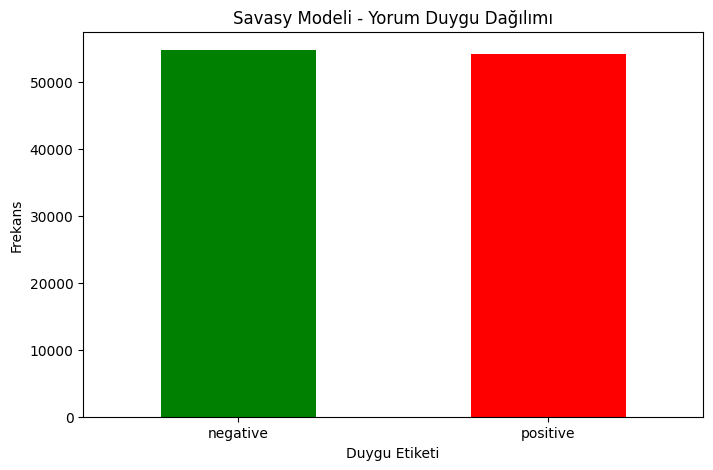

In [ ]:
label_counts = df_comments["savasy_label"].value_counts()

plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar", color=["green", "red"])  
plt.xlabel("Duygu Etiketi")
plt.ylabel("Frekans")
plt.title("Savasy Modeli - Yorum Duygu Dağılımı")
plt.xticks(rotation=0)  
plt.show()

In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Bert")
file_name = "comments_savasy.csv"
file_path = os.path.join(comment_path, file_name)
df_comments.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

In [ ]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Bert", "comments_savasy.csv")

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",positive,0.931962
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,negative,0.669085
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,negative,0.964131
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",positive,0.906424
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,negative,0.999406


Bert - 2 : bayrameker/turkish-sentiment-modern-bert

In [ ]:
model_name = "bayrameker/turkish-sentiment-modern-bert"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

yorumlar = df_comments["Yorum_V1"].astype(str).tolist()

MAX_LENGTH = 512  
BATCH_SIZE = 32  

bayrameker_labels = []
bayrameker_scores = []

for i in tqdm(range(0, len(yorumlar), BATCH_SIZE), desc="İşleniyor"):
    batch_yorumlar = yorumlar[i:i + BATCH_SIZE]

    inputs = tokenizer(batch_yorumlar, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors="pt").to(device)

    with torch.no_grad():
        logits = model(**inputs).logits

    probabilities = F.softmax(logits, dim=-1)

    labels = ["Negative", "Neutral", "Positive"]

    for prob in probabilities:
        neg_score, neutral_score, pos_score = prob.tolist()

        if neutral_score < 0.5:
            if neg_score > pos_score:
                sentiment_label = "Negative"
                sentiment_score = neg_score
            else:
                sentiment_label = "Positive"
                sentiment_score = pos_score
        else:
            sentiment_label = "Positive" if pos_score > neg_score else "Negative"
            sentiment_score = max(neg_score, pos_score)

        bayrameker_labels.append(sentiment_label)
        bayrameker_scores.append(sentiment_score)

df_comments["bayrameker_label"] = bayrameker_labels
df_comments["bayrameker_skor"] = bayrameker_scores

df_comments.head()

İşleniyor:   1%|          | 31/3411 [02:12<4:08:23,  4.41s/it]

In [ ]:
label_counts = df_comments["bayrameker_label"].value_counts()

plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar", color=["green", "red"])  
plt.xlabel("Duygu Etiketi")
plt.ylabel("Frekans")
plt.title("Savasy Modeli - Yorum Duygu Dağılımı")
plt.xticks(rotation=0)  
plt.show()

In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Bert")
file_name = "comments_bayrameker.csv"
file_path = os.path.join(comment_path, file_name)
df_comments.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

3 - Label Manuel Kontrol

In [ ]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Bert", "comments_bayrameker.csv")

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",positive,0.931962,Positive,0.963947
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,negative,0.669085,Positive,0.991367
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,negative,0.964131,Positive,0.924904
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",positive,0.906424,Positive,0.974138
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,negative,0.999406,Positive,0.791039


In [5]:
df_comments["savasy_label"].value_counts()

savasy_label
negative    54829
positive    54313
Name: count, dtype: int64

In [13]:
df_comments["savasy_label"] = df_comments["savasy_label"].apply(lambda x: 'Positive' if x == 'positive' else 'Negative')
df_comments["savasy_label"].value_counts()

savasy_label
Negative    54829
Positive    54313
Name: count, dtype: int64

In [6]:
df_comments["bayrameker_label"].value_counts()

bayrameker_label
Positive    97786
Negative    11356
Name: count, dtype: int64

In [16]:
df_pos_neg = df_comments[(df_comments["savasy_label"] == "Positive")  & (df_comments["bayrameker_label"] == "Negative") ]
df_pos_neg.head(5)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor
24,04 Aralık 2024,167cm,67,L,yesilini alip cok begendim elbise cok şık ve zarif 63 kilo L aldm ama mde olurmus,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,yesilini alip çok beğendim elbise çok şık ve zarif 63 kilo L aldm ama mde olurmus,81,yesilini alip çok beğendim elbise çok şık ve zarif 63 kilo l aldm ama mde olurmus,Positive,0.909539,Negative,0.537202
106,07 Ağustos 2024,Bilgi mevcut değil,Bilgi mevcut değil,L,Çok güzel bir elbise her şeyle kombinlenebilir m beden giyiyor olmama rağmen l beden aldım xl bile alsam olurmuş üzerime yapışmaması için ama bayıldım çok güzel 🌸,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,Çok güzel bir elbise her şeyle kombinlenebilir m beden giyiyor olmama rağmen l beden aldım xl bile alsam olurmuş üzerime yapışmaması için ama bayıldım çok güzel,161,çok güzel bir elbise her şeyle kombinlenebilir m beden giyiyor olmama rağmen l beden aldım xl bile alsam olurmuş üzerime yapışmaması için ama bayıldım çok güzel,Positive,0.994777,Negative,0.504592
130,10 Haziran 2024,169cm,52,XS,ÇOK İYİ MÜKEMMEL İYİ FAZLA İYİ OLAĞANÜSTÜ İYİ SORGUSUZ SUALSİZ SADECE ALIN ALIN ALIN,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,ÇOK İYİ MÜKEMMEL İYİ FAZLA İYİ OLAĞANÜSTÜ İYİ SORGUSUZ SUALSİZ SADECE ALIN ALIN ALIN,84,çok i̇yi̇ mükemmel i̇yi̇ fazla i̇yi̇ olağanüstü i̇yi̇ sorgusuz sualsi̇z sadece alin alin alin,Positive,0.997868,Negative,0.543504
162,13 Ağustos 2024,167cm,50,L,L beden alırken terddüt etmiştim ama cuk oldu sadece kumaşı biraz ince çok esnediği zaman iç gösteriyor ama üstünüzde hiç yokmuş gibi ağırlık yapmıyor,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,L beden alırken terddüt etmiştim ama cuk oldu sadece kumaşı biraz ince çok esnediği zaman iç gösteriyor ama üstünüzde hiç yokmuş gibi ağırlık yapmıyor,150,l beden alırken terddüt etmiştim ama cuk oldu sadece kumaşı biraz ince çok esnediği zaman iç gösteriyor ama üstünüzde hiç yokmuş gibi ağırlık yapmıyor,Positive,0.629050,Negative,0.685516
188,18 Temmuz 2024,163cm,56,M,ÇOK ÇOK GÜZEL BİR ÜRÜNN 57 kilo 163 boy M beden aldim tam oturdu bi tik uzun ama yuksek taban ayakkabiyla guzel olur vucuda oturuyor ve cok hos duruyor ince belliyseniz hicc dusunmeden alinn🤌🏻🤌🏻 +erken teslimat,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,ÇOK ÇOK GÜZEL BİR ÜRÜNN 57 kilo 163 boy M beden aldım tam oturdu bir tık uzun ama yuksek taban ayakkabiyla güzel olur vucuda oturuyor ve çok hos duruyor ince belliyseniz hicc dusunmeden alinn +erken teslimat,207,çok çok güzel bi̇r ürünn 57 kilo 163 boy m beden aldım tam oturdu bir tık uzun ama yuksek taban ayakkabiyla güzel olur vucuda oturuyor ve çok hos duruyor ince belliyseniz hicc dusunmeden alinn +erken teslimat,Positive,0.979976,Negative,0.690730


In [17]:
df_pos_neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 24 to 109043
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tarih             2312 non-null   object 
 1   Boy               2312 non-null   object 
 2   Kilo              2312 non-null   object 
 3   Beden             2312 non-null   object 
 4   Yorum             2312 non-null   object 
 5   Ürün Adı          2312 non-null   object 
 6   Yorum_V1          2312 non-null   object 
 7   Yorum Uzunluğu    2312 non-null   int64  
 8   Yorum_V2          2312 non-null   object 
 9   savasy_label      2312 non-null   object 
 10  savasy_skor       2312 non-null   float64
 11  bayrameker_label  2312 non-null   object 
 12  bayrameker_skor   2312 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 252.9+ KB


In [19]:
df_neg_pos = df_comments[(df_comments["savasy_label"] == "Negative")  & (df_comments["bayrameker_label"] == "Positive") ]
df_neg_pos.head(10)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,Negative,0.669085,Positive,0.991367
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,Negative,0.964131,Positive,0.924904
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,Negative,0.999406,Positive,0.791039
6,28 Ocak 2025,Bilgi mevcut değil,Bilgi mevcut değil,S,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,60,170 60 kiloyum s beden aldım dar olsun diye gayet güzel ürün,Negative,0.994993,Positive,0.991931
10,06 Aralık 2024,163cm,60,S,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,62,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,Negative,0.969913,Positive,0.691063
11,19 Kasım 2024,165cm,55,S,s aldım xs alsaydım keşke uzun geldi mecbur kestireceğim ama kuması mükemmel,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,s aldım xs alsaydım keşke uzun geldi mecbur kestireceğim ama kuması mükemmel,76,s aldım xs alsaydım keşke uzun geldi mecbur kestireceğim ama kuması mükemmel,Negative,0.989185,Positive,0.989555
16,27 Eylül 2024,Bilgi mevcut değil,Bilgi mevcut değil,M,Elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.Bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. Sıfır kol olan modeli de alıcam.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.Bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. Sıfır kol olan modeli de alıcam.,322,elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 ki

In [20]:
df_neg_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45785 entries, 1 to 109139
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tarih             45780 non-null  object 
 1   Boy               45785 non-null  object 
 2   Kilo              45785 non-null  object 
 3   Beden             45785 non-null  object 
 4   Yorum             45785 non-null  object 
 5   Ürün Adı          45785 non-null  object 
 6   Yorum_V1          45785 non-null  object 
 7   Yorum Uzunluğu    45785 non-null  int64  
 8   Yorum_V2          45785 non-null  object 
 9   savasy_label      45785 non-null  object 
 10  savasy_skor       45785 non-null  float64
 11  bayrameker_label  45785 non-null  object 
 12  bayrameker_skor   45785 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 4.9+ MB


In [21]:
0.994505	*(-1)

-0.994505

In [22]:
df_comments["savasy_skor"] = df_comments.apply( lambda row: row["savasy_skor"] * -1 if row["savasy_label"] == "Negative" else row["savasy_skor"],   axis=1)
df_comments["bayrameker_skor"] = df_comments.apply( lambda row: row["bayrameker_skor"] * -1 if row["bayrameker_label"] == "Negative" else row["bayrameker_skor"],   axis=1)
df_comments.head(10)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",Positive,0.931962,Positive,0.963947
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,Negative,-0.669085,Positive,0.991367
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,Negative,-0.964131,Positive,0.924904
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",Positive,0.906424,Positive,0.974138
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,Negative,-0.999406,Positive,0.791039
5,31 Ocak 2025,163cm,45,XS,Çok rahat efıl efıl mükemmel,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Çok rahat efıl efıl mükemmel,28,çok rahat efıl efıl mükemmel,Positive,0.987008,Positive,0.995842
6,28 Ocak 2025,Bilgi mevcut değil,Bilgi mevcut değil,S,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,60,170 60 kiloyum s beden aldım dar olsun diye gayet güzel ürün,Negative,-0.994993,Positive,0.991931
7,14 Ocak 2025,172cm,85,L,Bayıldıııııımm muazzam bir elbise,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Bayıldıııııımm muazzam bir elbise,33,bayıldıııııımm muazzam bir elbise,Positive,0.992665,Positive,0.789671
8,14 Ocak 2025,168cm,56,M,1.68 56 kilo normal bedenim S ama üzerime yapışmasın diye M beden aldım çok güzel oldu kumaşı kalitesi çok iyi bayıldım. Tek sorun adımlarınız büyükse biraz kasıyor onun dışında bayıldım. Severek kullanacağım,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 56 kilo normal bedenim S ama üzerime yapışmasın diye M beden aldım çok güzel oldu kumaşı kalitesi çok iyi bayıldım. Tek sorun adımlarınız büyükse biraz kasıyor onun dışında bayıldım. Sever

In [25]:
max_lengt = max(df_comments["savasy_skor"] )
min_lengt = min(df_comments["savasy_skor"] )

print("Max Length: ", max_lengt)
print("Min Length: ", min_lengt)

Max Length:  0.9998928308486938
Min Length:  -0.9997552037239076


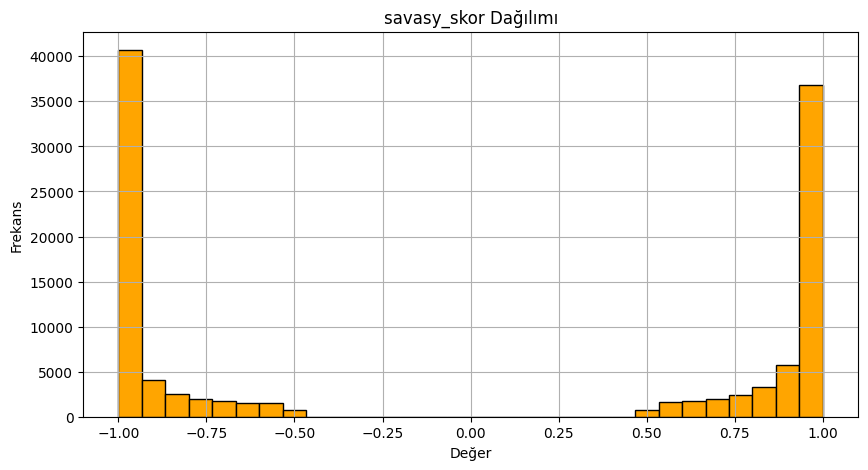

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df_comments["savasy_skor"], bins=30, color='orange', edgecolor='black')
plt.title("savasy_skor Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

In [ ]:
max_lengt = max(df_comments["bayrameker_skor"] )
min_lengt = min(df_comments["bayrameker_skor"] )

print("Max Length: ", max_lengt)
print("Min Length: ", min_lengt)

Max Length:  0.9998928308486938
Min Length:  -0.9997552037239076


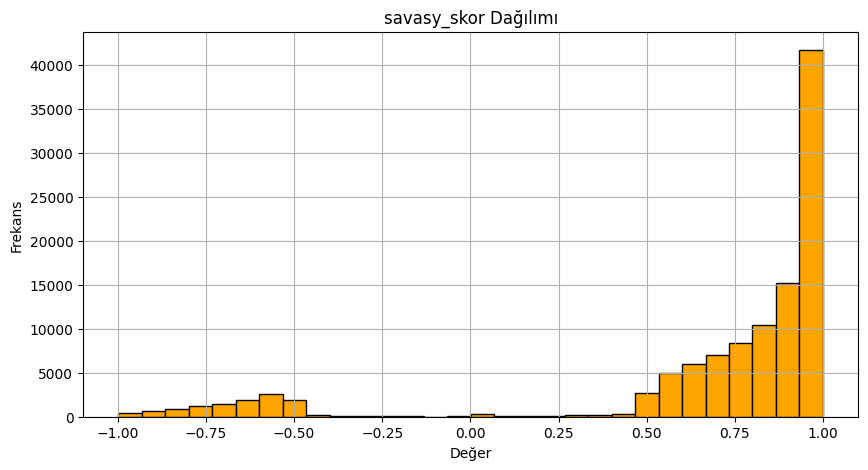

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_comments["bayrameker_skor"], bins=30, color='orange', edgecolor='black')
plt.title("savasy_skor Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

4 - Bert Skorlarının Konsolidasyonu

In [31]:
df_comments["bert_skor"] = (df_comments["bayrameker_skor"] + df_comments["savasy_skor"]) / 2
df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",Positive,0.931962,Positive,0.963947,0.947954
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,Negative,-0.669085,Positive,0.991367,0.161141
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,Negative,-0.964131,Positive,0.924904,-0.019614
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",Positive,0.906424,Positive,0.974138,0.940281
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,Negative,-0.999406,Positive,0.791039,-0.104184


In [34]:
print((df_comments["bert_skor"] > 0).sum(), "pozitif değer")
print((df_comments["bert_skor"] < 0).sum(), "negatif değer")
print((df_comments["bert_skor"] == 0).sum(), "sıfır")

65700 pozitif değer
43442 negatif değer
0 sıfır


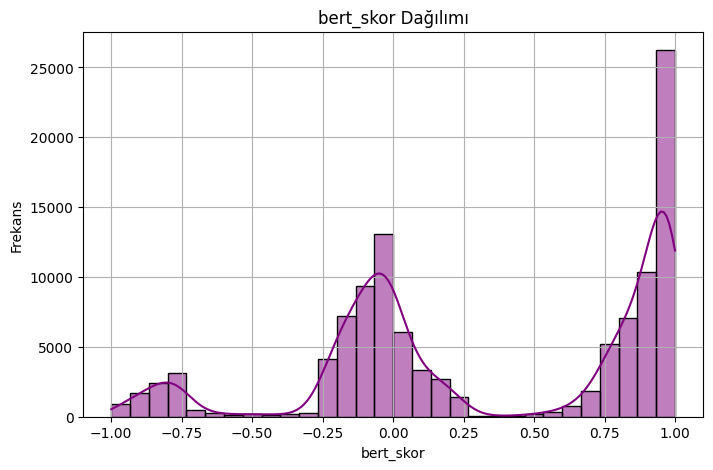

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df_comments["bert_skor"], bins=30, kde=True, color='purple')
plt.title("bert_skor Dağılımı")
plt.xlabel("bert_skor")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

In [35]:
df_comments["bert_label"] = df_comments["bert_skor"].apply(lambda x: "Positive" if x > 0 else "Negative")
df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_skor,bert_label
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",Positive,0.931962,Positive,0.963947,0.947954,Positive
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,Negative,-0.669085,Positive,0.991367,0.161141,Positive
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,Negative,-0.964131,Positive,0.924904,-0.019614,Negative
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",Positive,0.906424,Positive,0.974138,0.940281,Positive
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,Negative,-0.999406,Positive,0.791039,-0.104184,Negative


In [36]:
bert_label_values = df_comments["bert_label"] 
bert_skor_values  = df_comments["bert_skor"]    

df_comments = df_comments.drop(columns=["bert_label", "bert_skor"])

df_comments["bert_label"] = bert_label_values
df_comments["bert_skor"] = bert_skor_values

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",Positive,0.931962,Positive,0.963947,Positive,0.947954
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,Negative,-0.669085,Positive,0.991367,Positive,0.161141
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,Negative,-0.964131,Positive,0.924904,Negative,-0.019614
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",Positive,0.906424,Positive,0.974138,Positive,0.940281
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,Negative,-0.999406,Positive,0.791039,Negative,-0.104184


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Bert")
file_name = "comments_bert_consolidation.csv"
file_path = os.path.join(comment_path, file_name)
df_comments.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

comments_bert_consolidation.csv olarak kaydedildi.
